In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
from scipy.linalg import svd

In [2]:
df = pd.read_csv('hastieHeartData.csv')
df.head()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [3]:
df.shape

(462, 11)

In [4]:
# Differntiate numerical variables and categorical variables.
num_DF = pd.DataFrame(df[['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age' ]])
cat_DF = pd.DataFrame(df[['famhist', 'chd']])

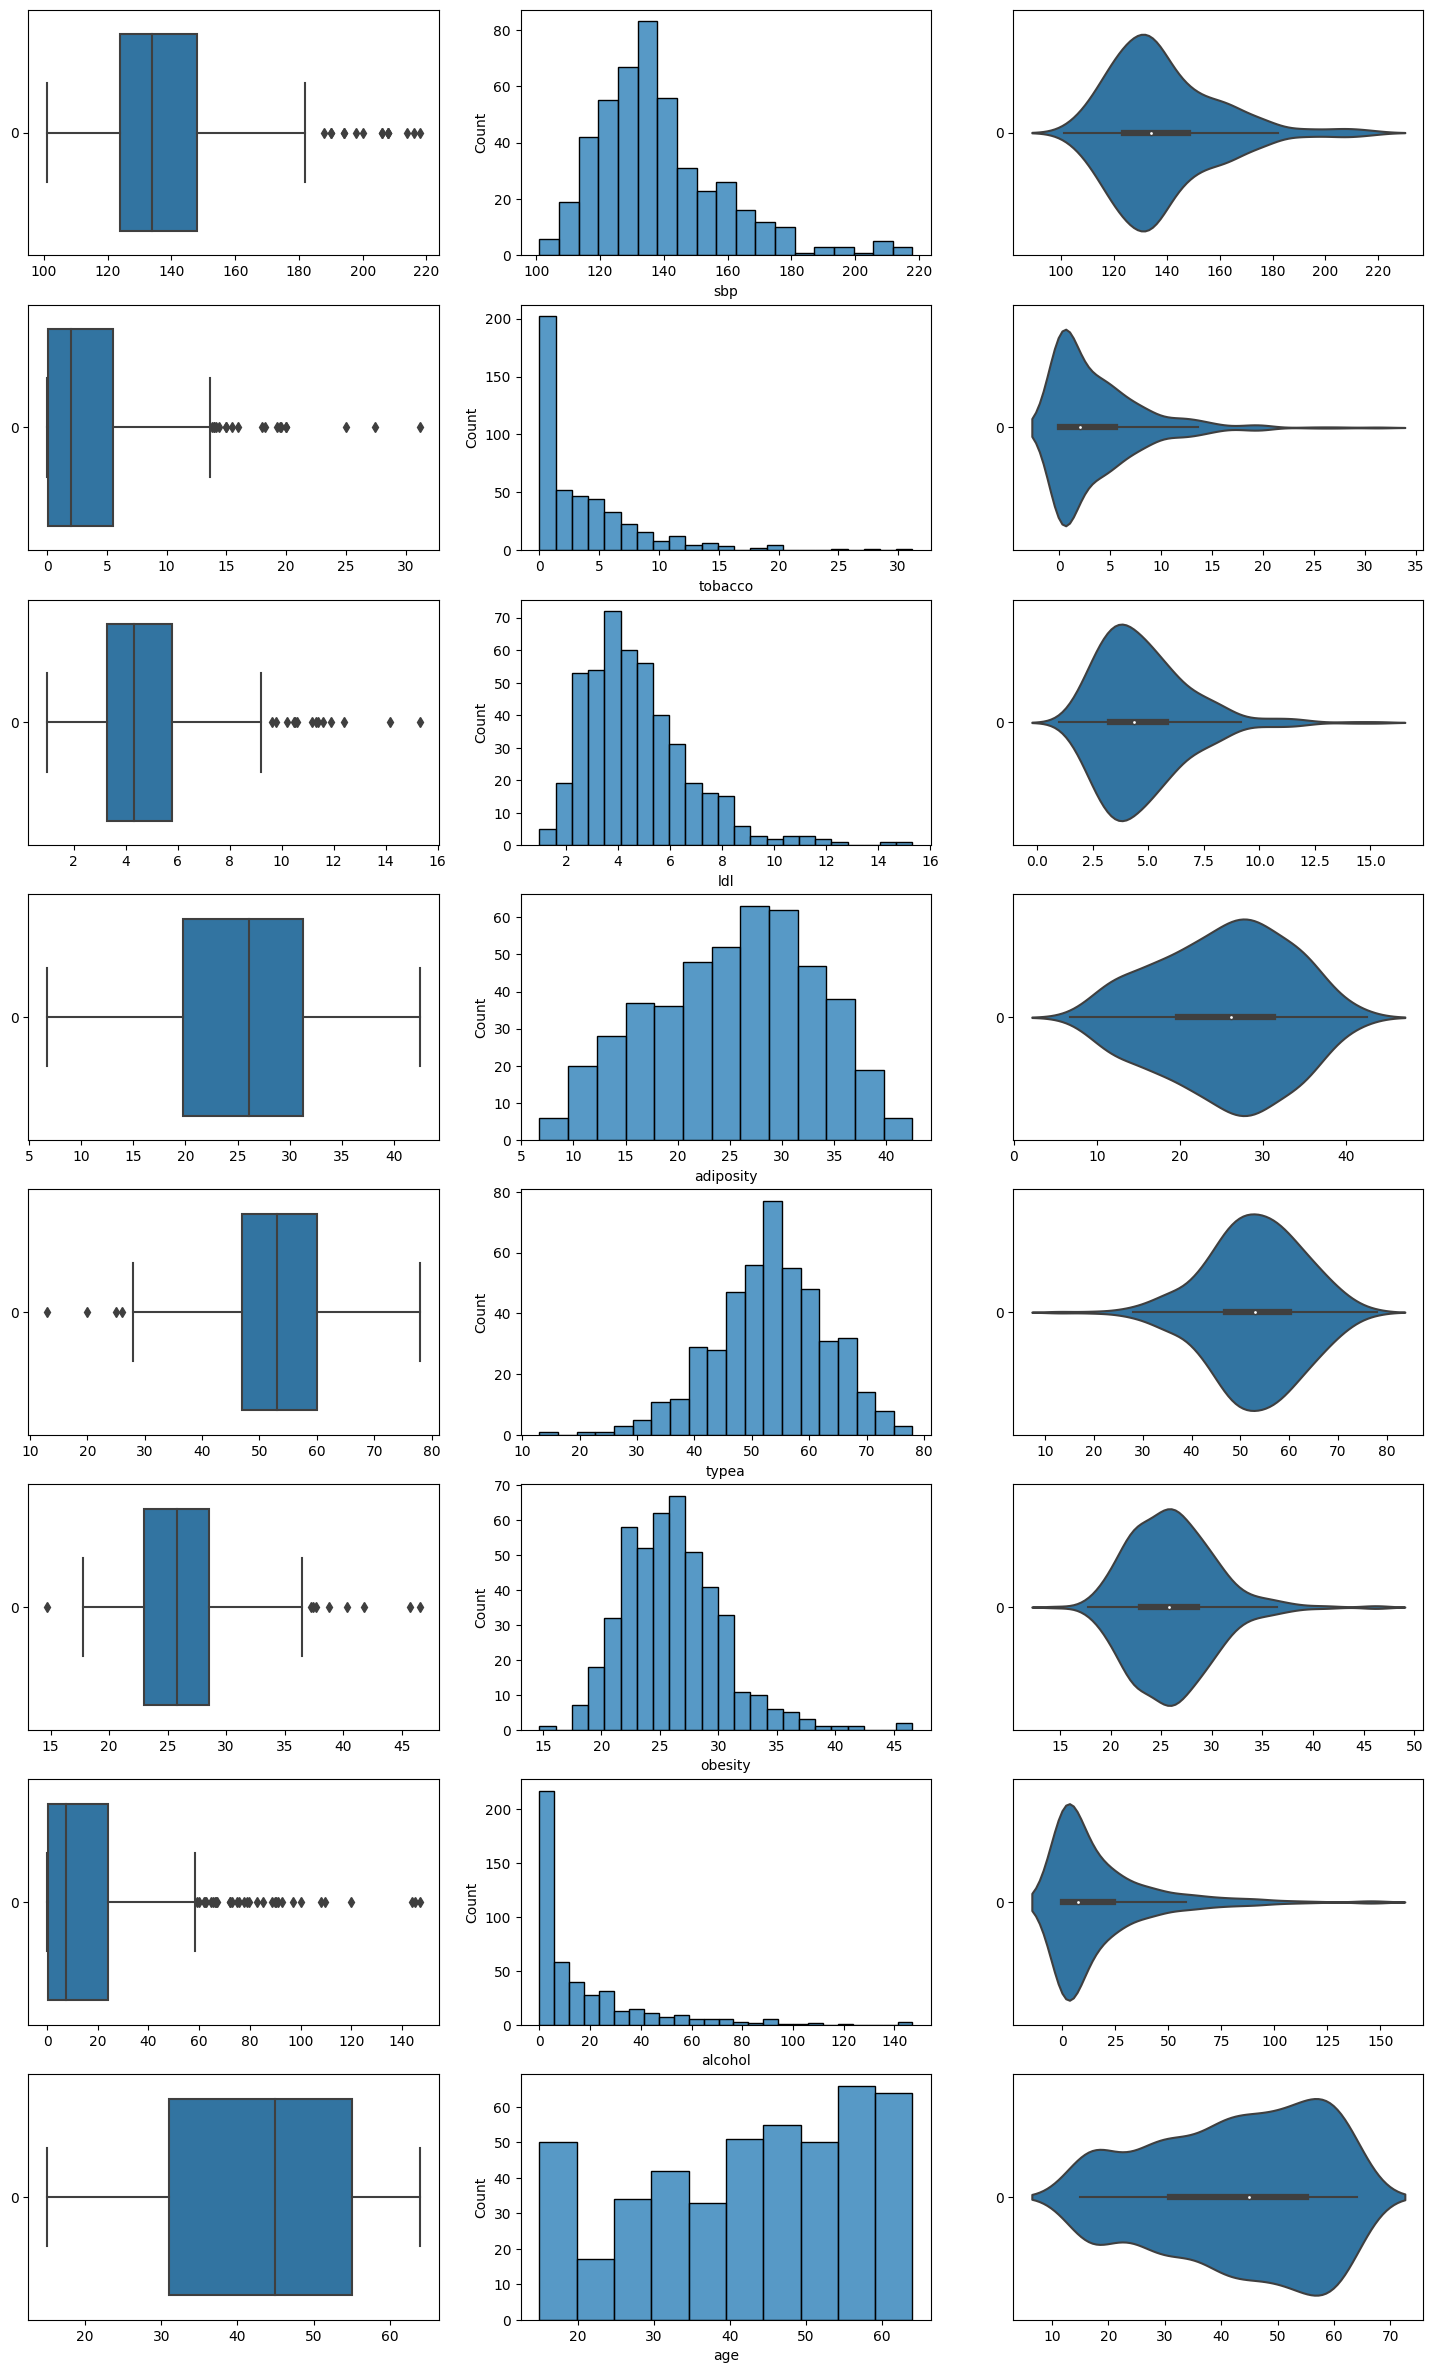

In [5]:
#visualization before data cleaning
f, axes = plt.subplots(8, 3, figsize=(18, 30))

count = 0
for var in num_DF:
    sb.boxplot(data = num_DF[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = num_DF[var], ax = axes[count,1])
    sb.violinplot(data = num_DF[var], orient = "h", ax = axes[count,2])
    count += 1

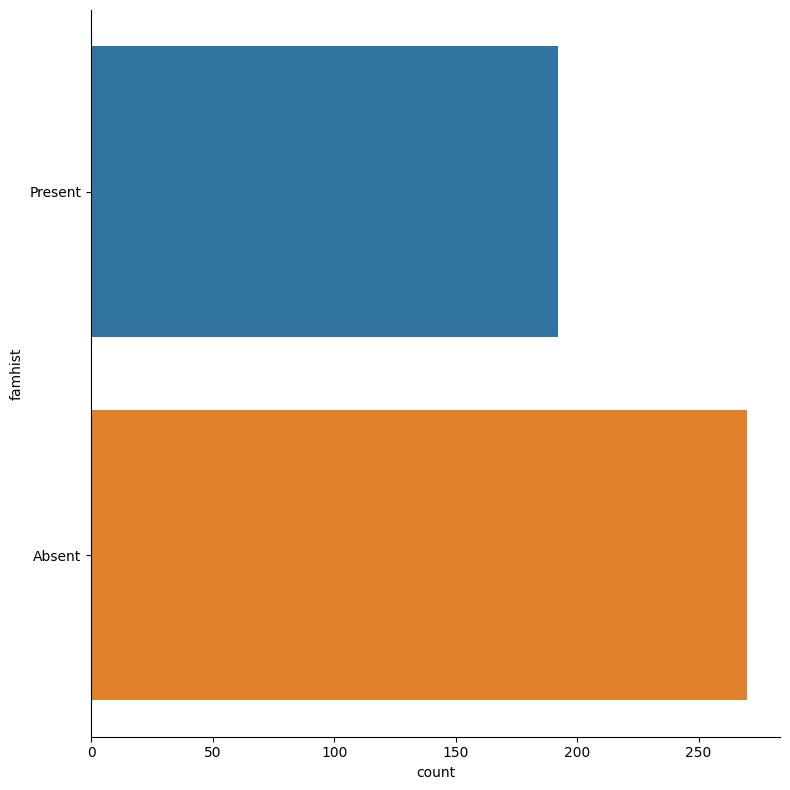

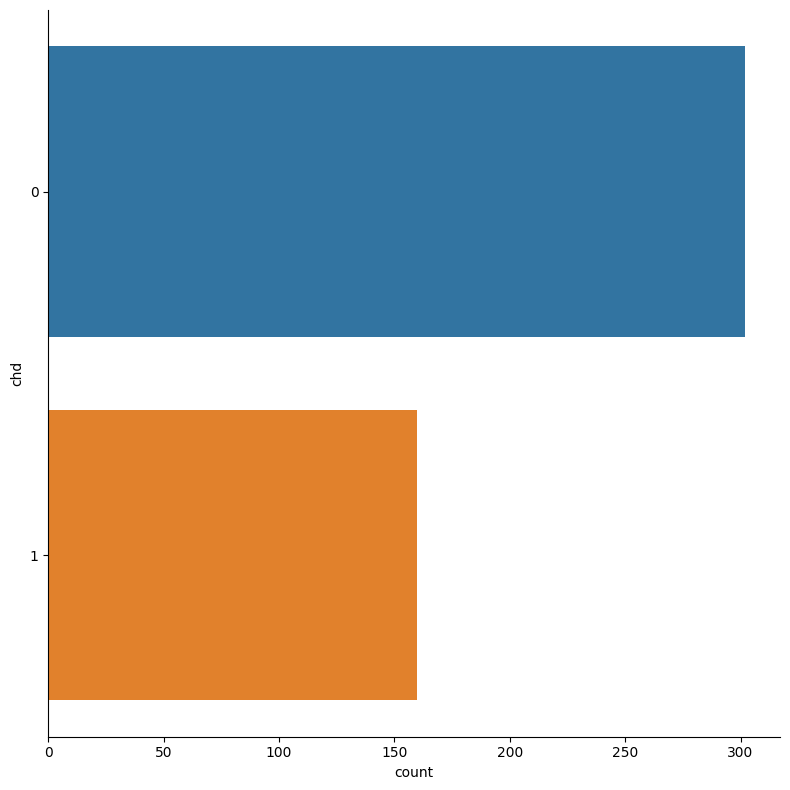

In [6]:
# cat plots
for var in cat_DF:
    sb.catplot(y = var, data = cat_DF, kind = "count", height = 8)

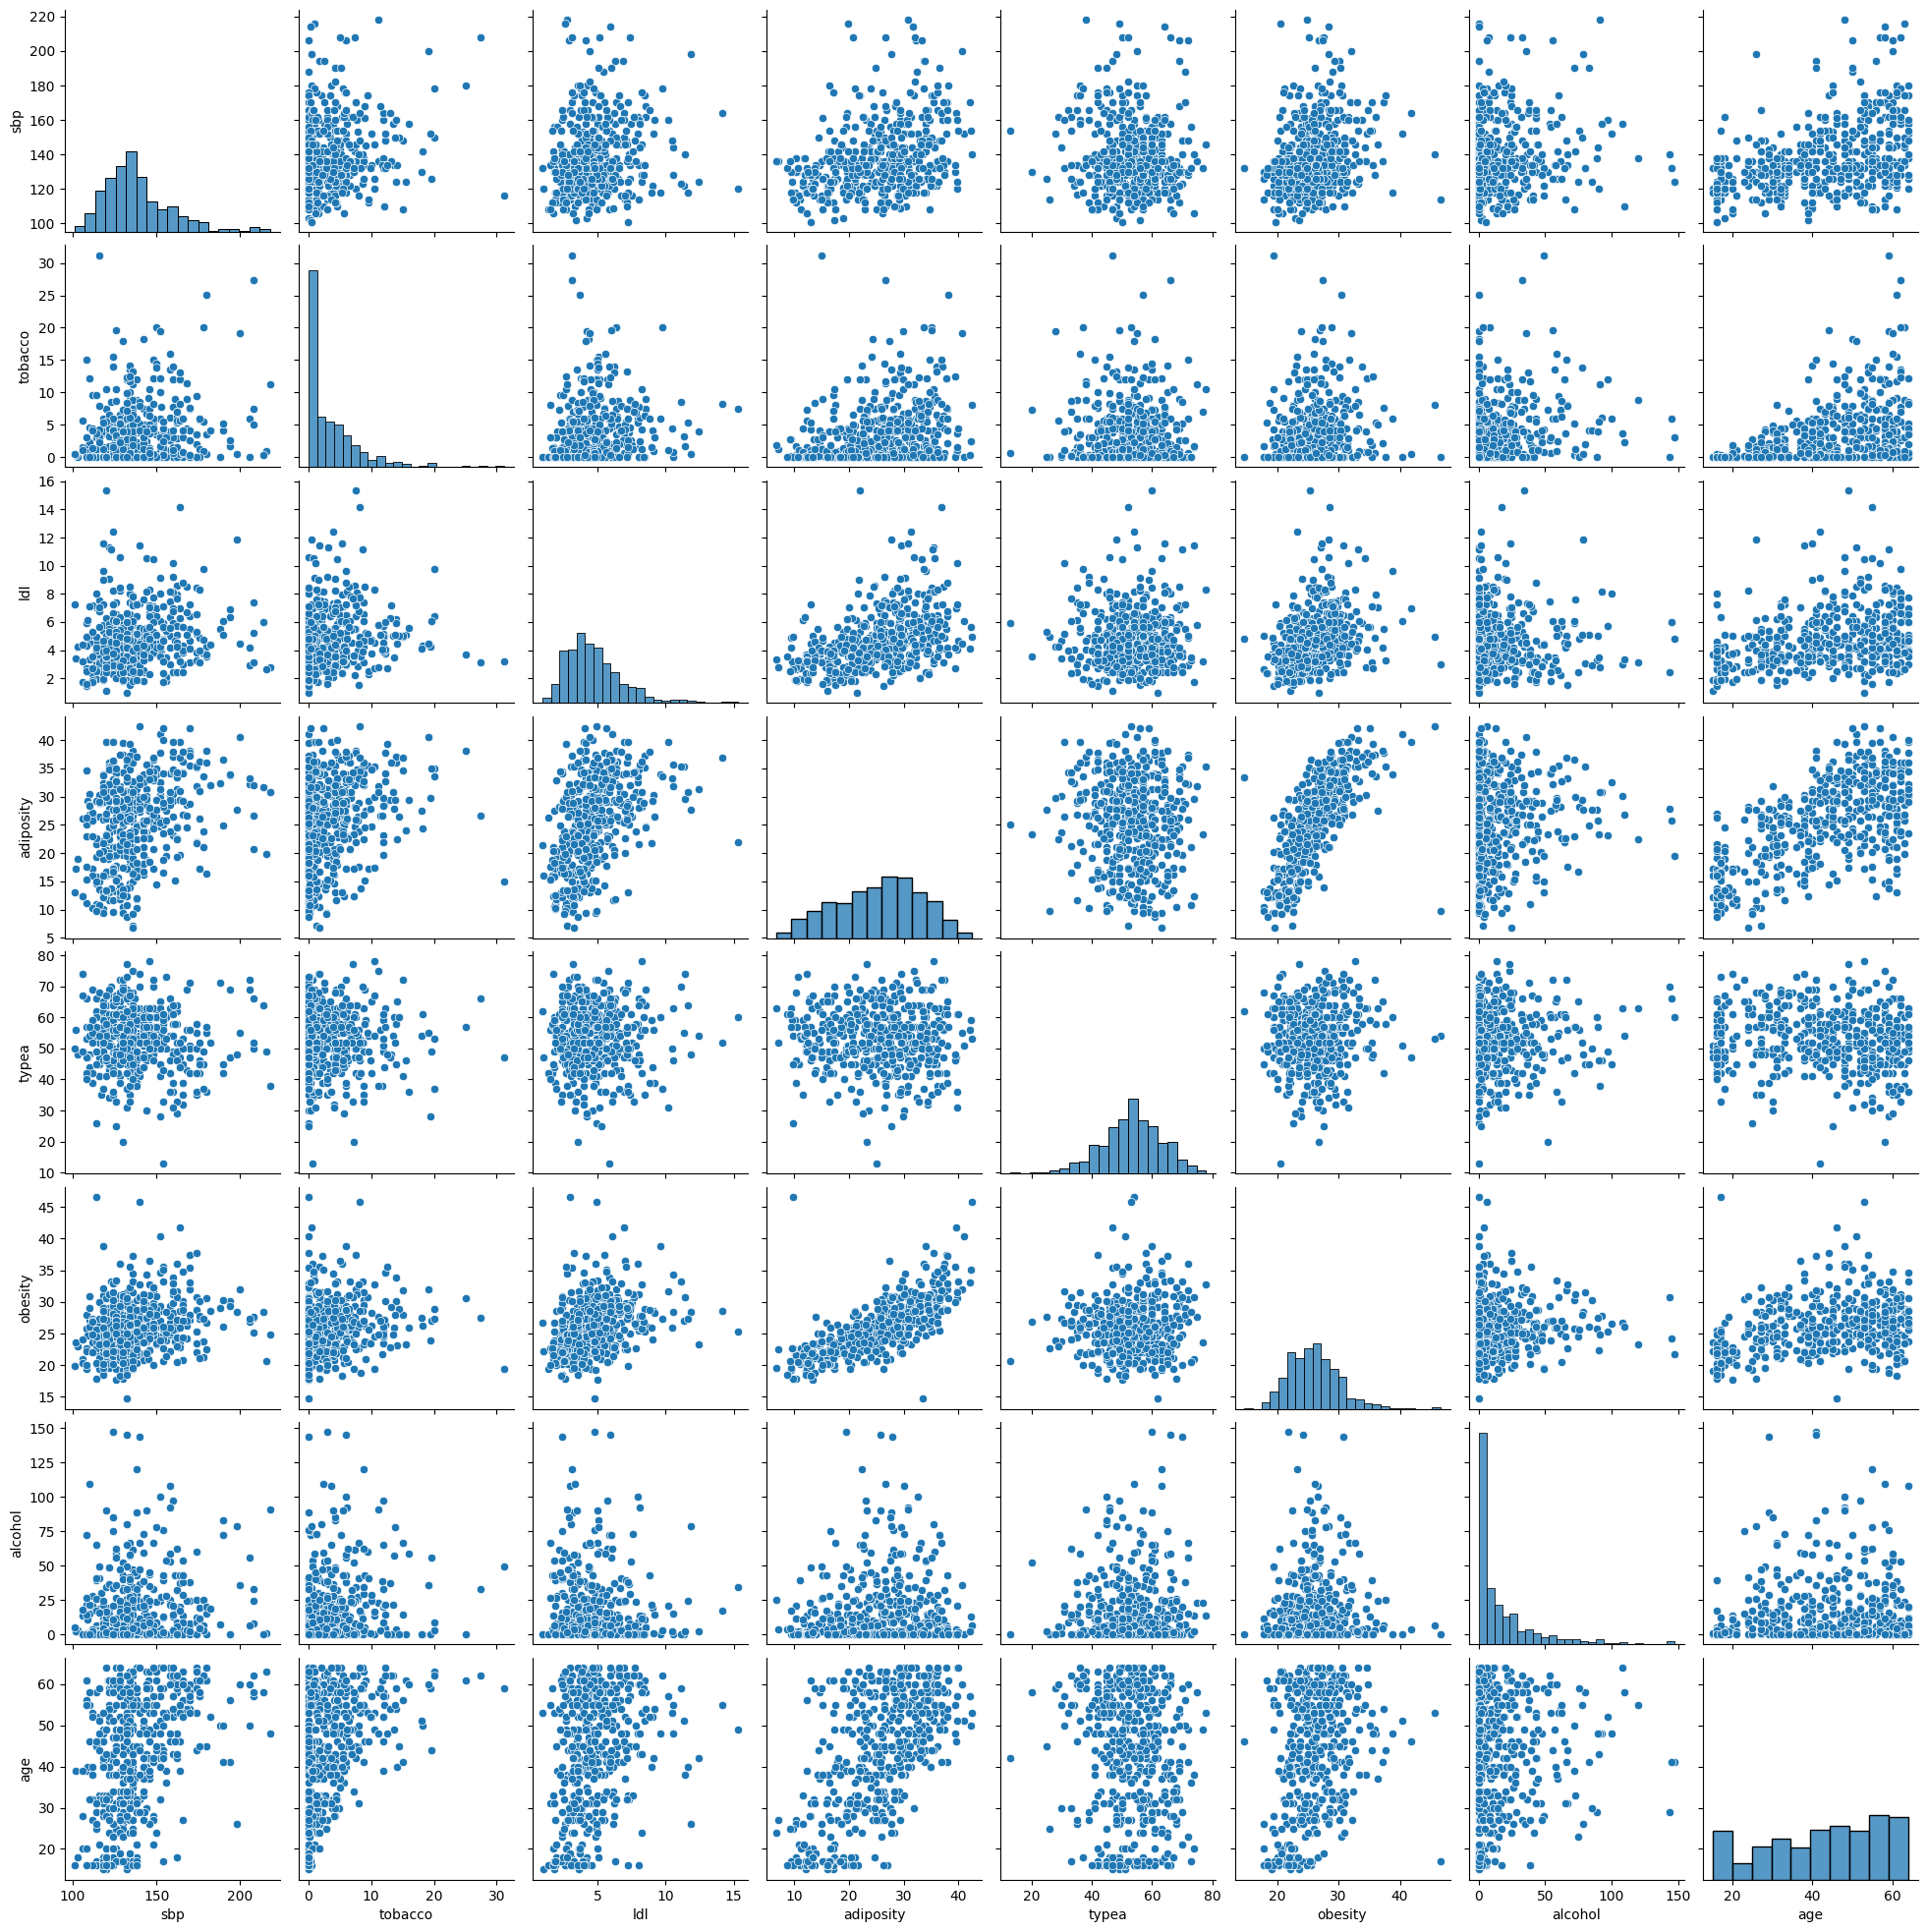

In [7]:
# Plot the numerical Data on 2D grids
sb.pairplot(num_DF)

<Axes: >

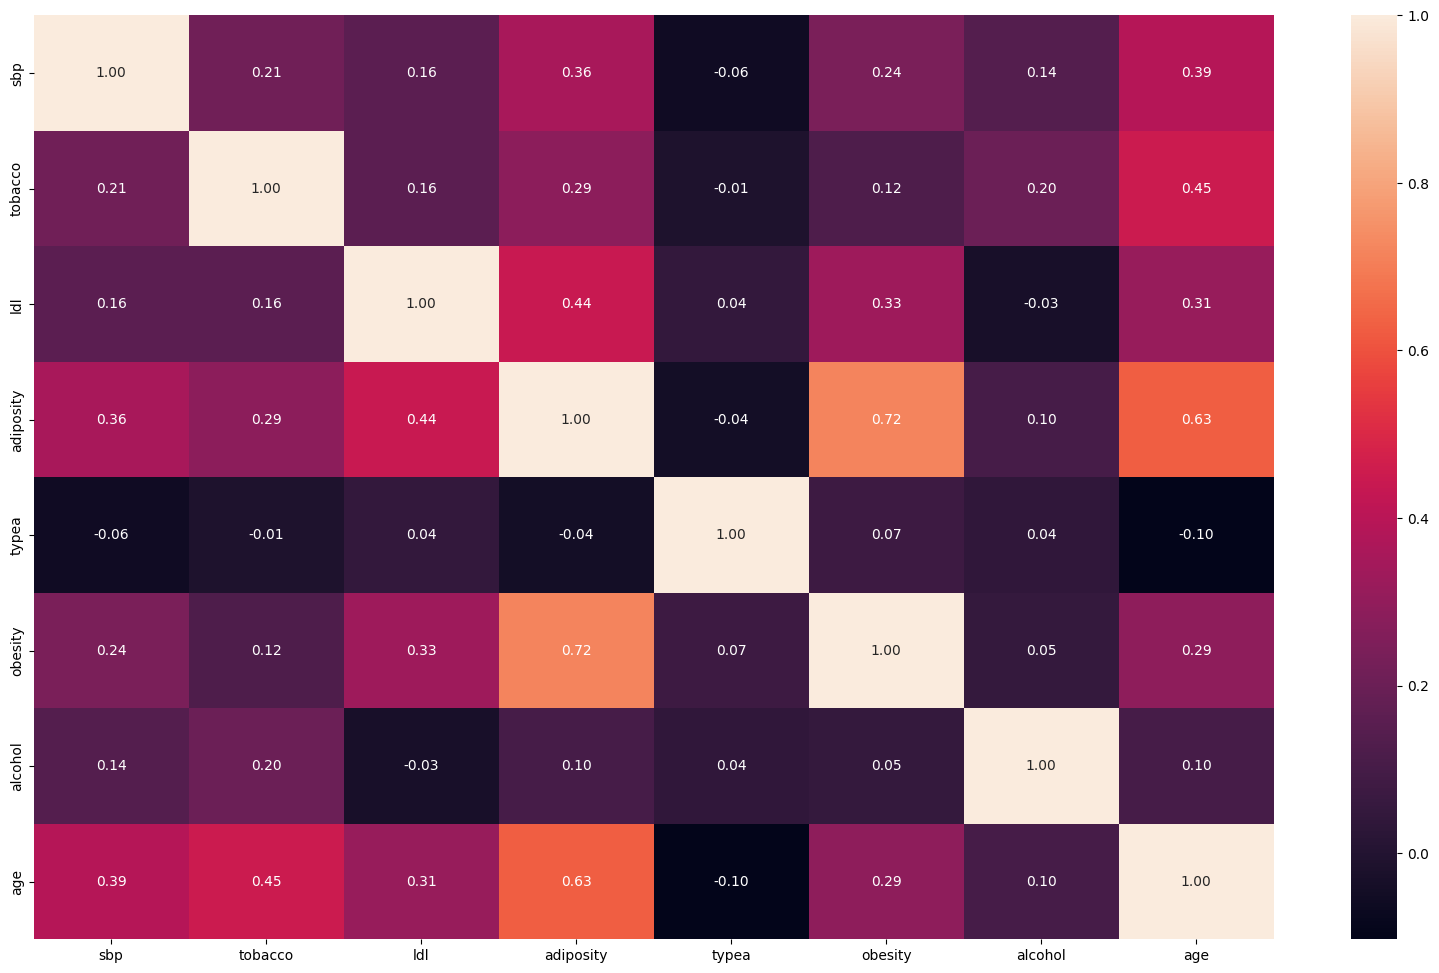

In [8]:
# Correlation between numerical dataset
f = plt.figure(figsize=(20, 12))
sb.heatmap(num_DF.corr(), annot = True, fmt = ".2f")

In [9]:
# PCA on numerical data
num_DF_NP = num_DF.to_numpy() # Convert to numpy
num_DF_NP_1 = num_DF_NP - np.mean(num_DF_NP, axis = 0) # Step 1 : Subtract the mean
num_DF_NP_2 = num_DF_NP_1 / np.std(num_DF_NP, axis = 0) # Step 2: Divide by std dev
U, S, Vh = svd(num_DF_NP_2, full_matrices = False) # Step 3: PCA by computing SVD
V = Vh.T

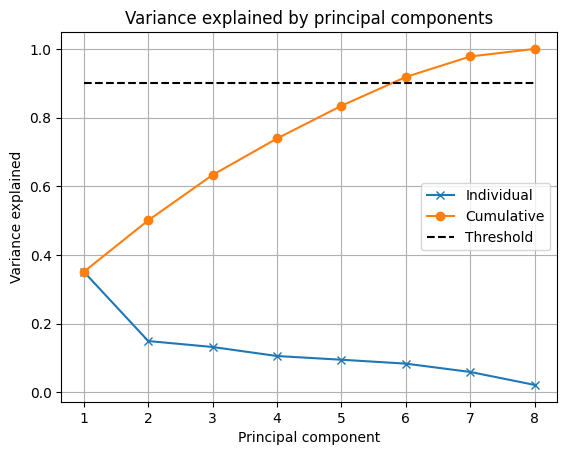

In [10]:
# Explained Variance
rho = (S*S) / (S*S).sum()

threshold = 0.9
plt.figure()
plt.plot(range(1,len(rho)+1),rho,'x-')
plt.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')
plt.plot([1,len(rho)],[threshold, threshold],'k--')
plt.title('Variance explained by principal components');
plt.xlabel('Principal component');
plt.ylabel('Variance explained');
plt.legend(['Individual','Cumulative','Threshold'])
plt.grid()
plt.show()

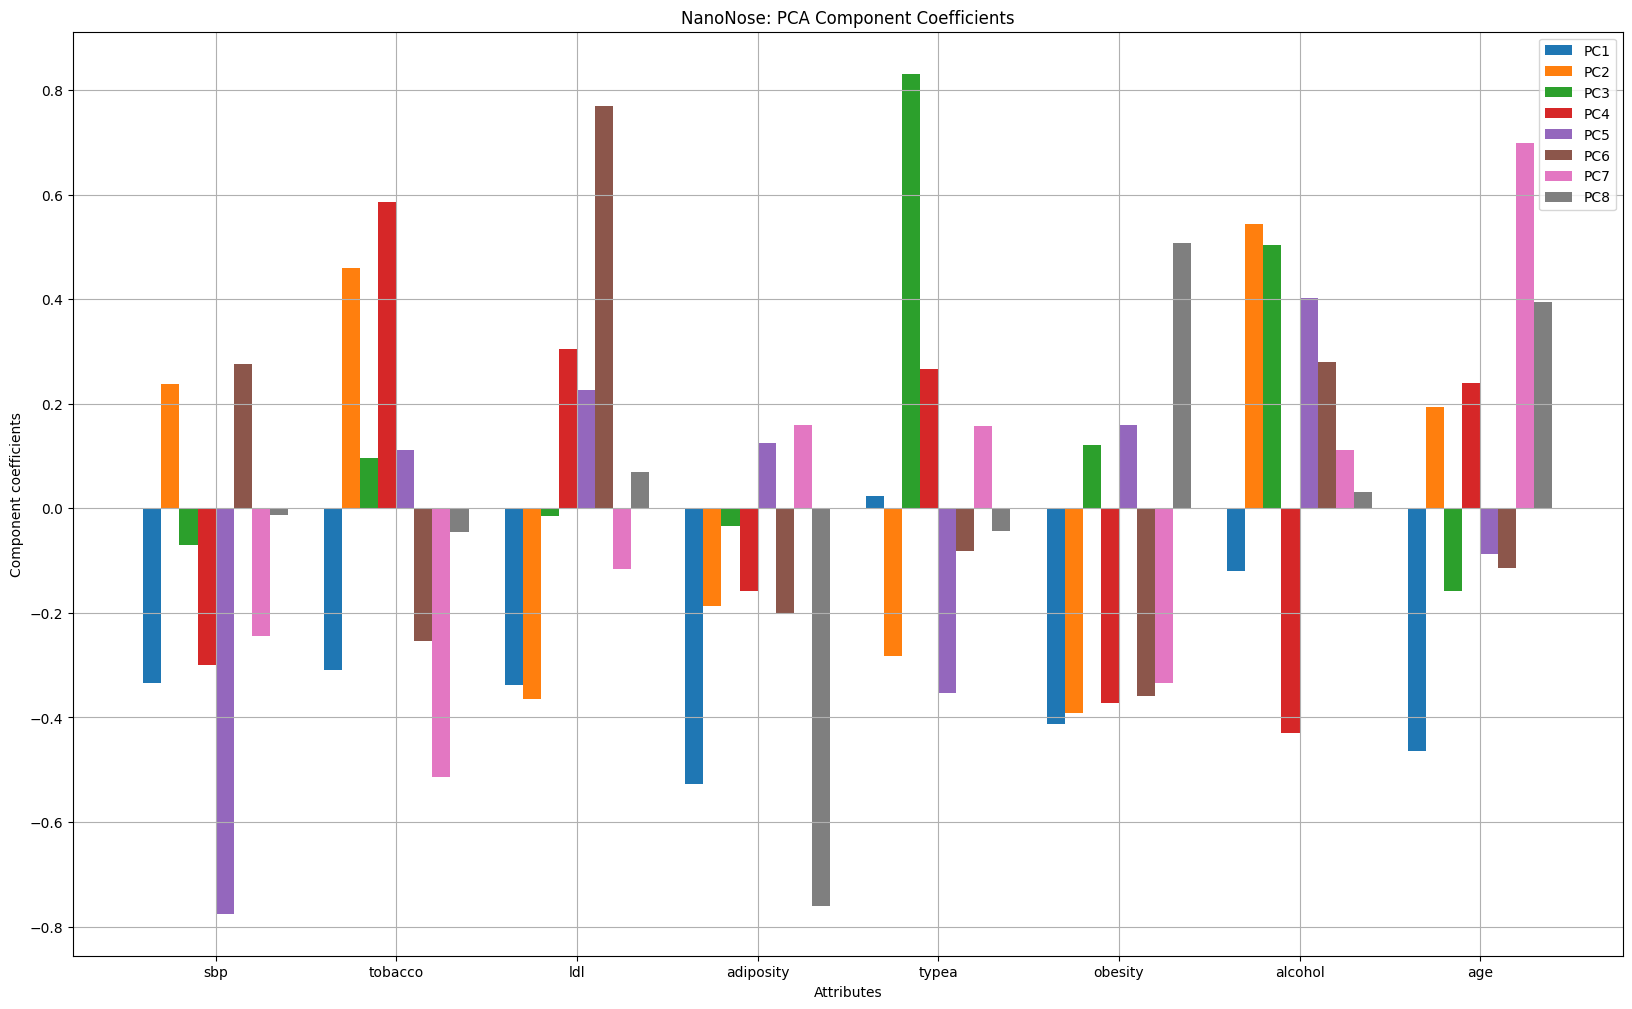

In [11]:
# PCA component coefficients and interpret principal direction for PCA / V
pcs = [0,1,2,3,4,5,6,7]
legendStrs = ['PC'+str(e+1) for e in pcs]
bw = .1
N,M = num_DF_NP.shape
r = np.arange(1,M+1)
f = plt.figure(figsize=(20, 12))
for i in pcs:
    plt.bar(r+i*bw, V[:,i], width=bw)
plt.xticks(r+3.5 * bw, ['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age' ])
plt.xlabel('Attributes')
plt.ylabel('Component coefficients')
plt.legend(legendStrs)
plt.grid()
plt.title('NanoNose: PCA Component Coefficients')
plt.show()

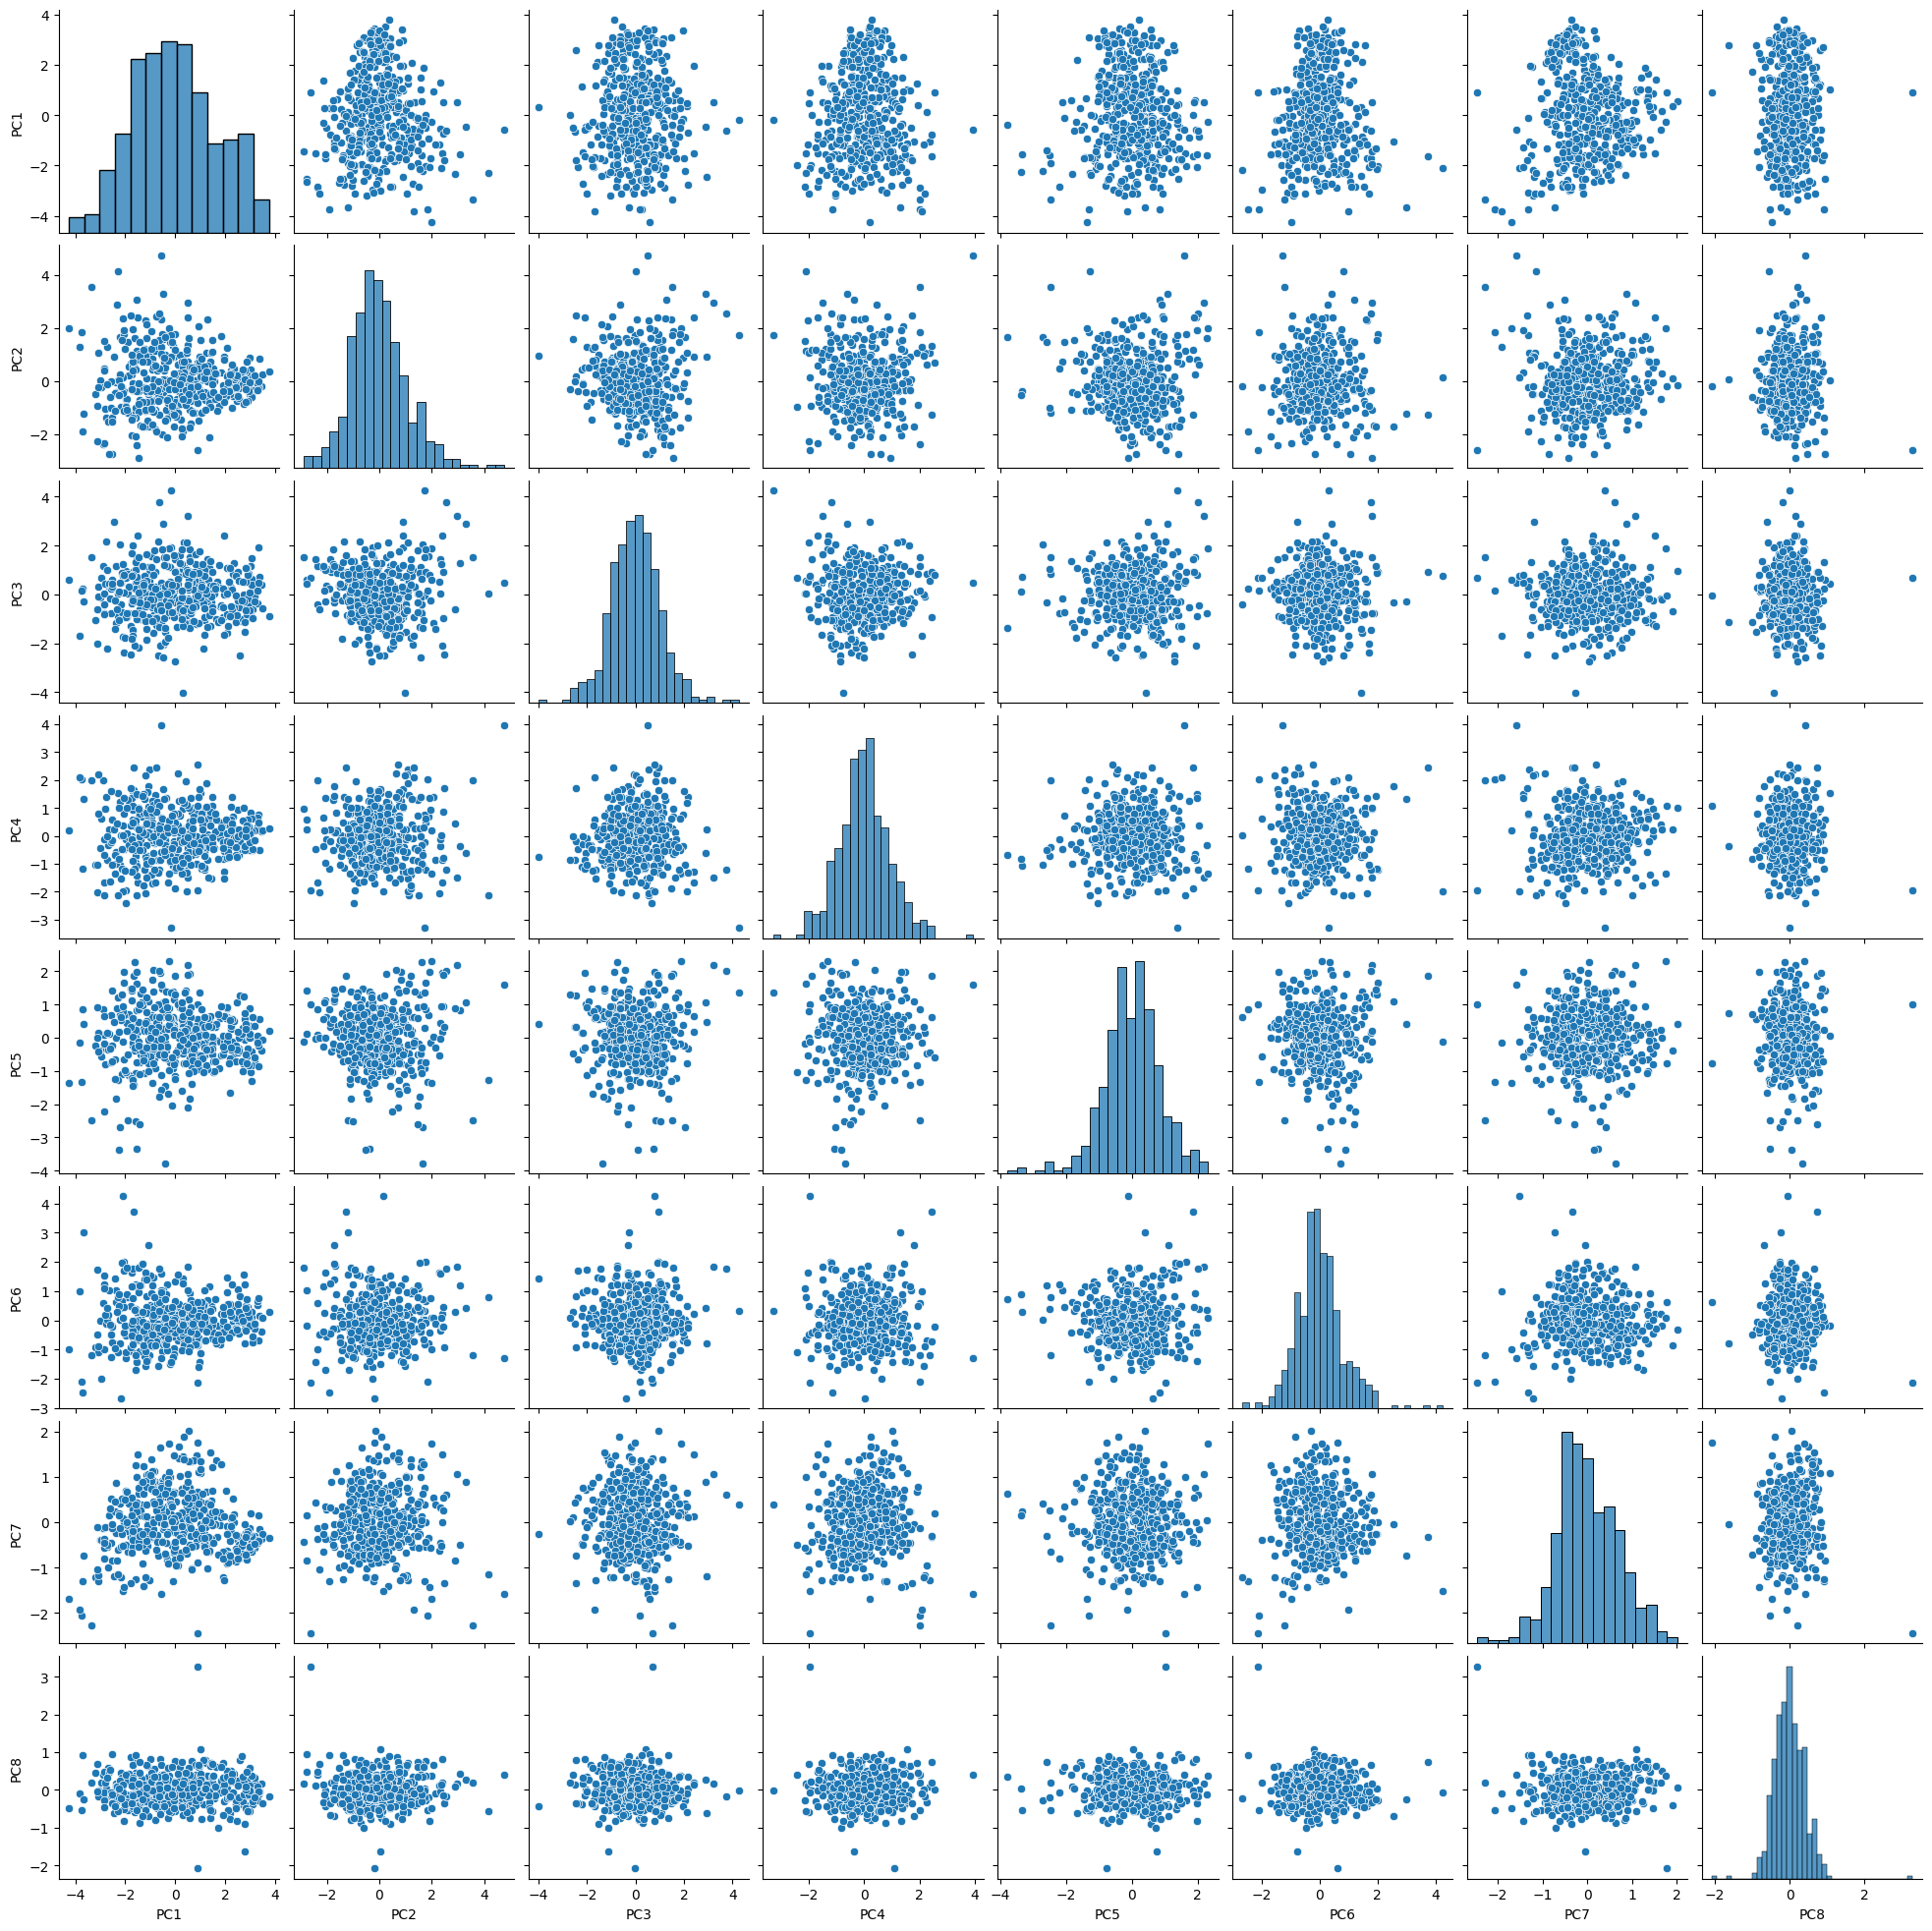

In [12]:
#PCA Projection
Z = num_DF_NP_2 @ V

#Plot projected data
num_DF_PCA = pd.DataFrame(Z, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])
sb.pairplot(num_DF_PCA)